Capitolo 2

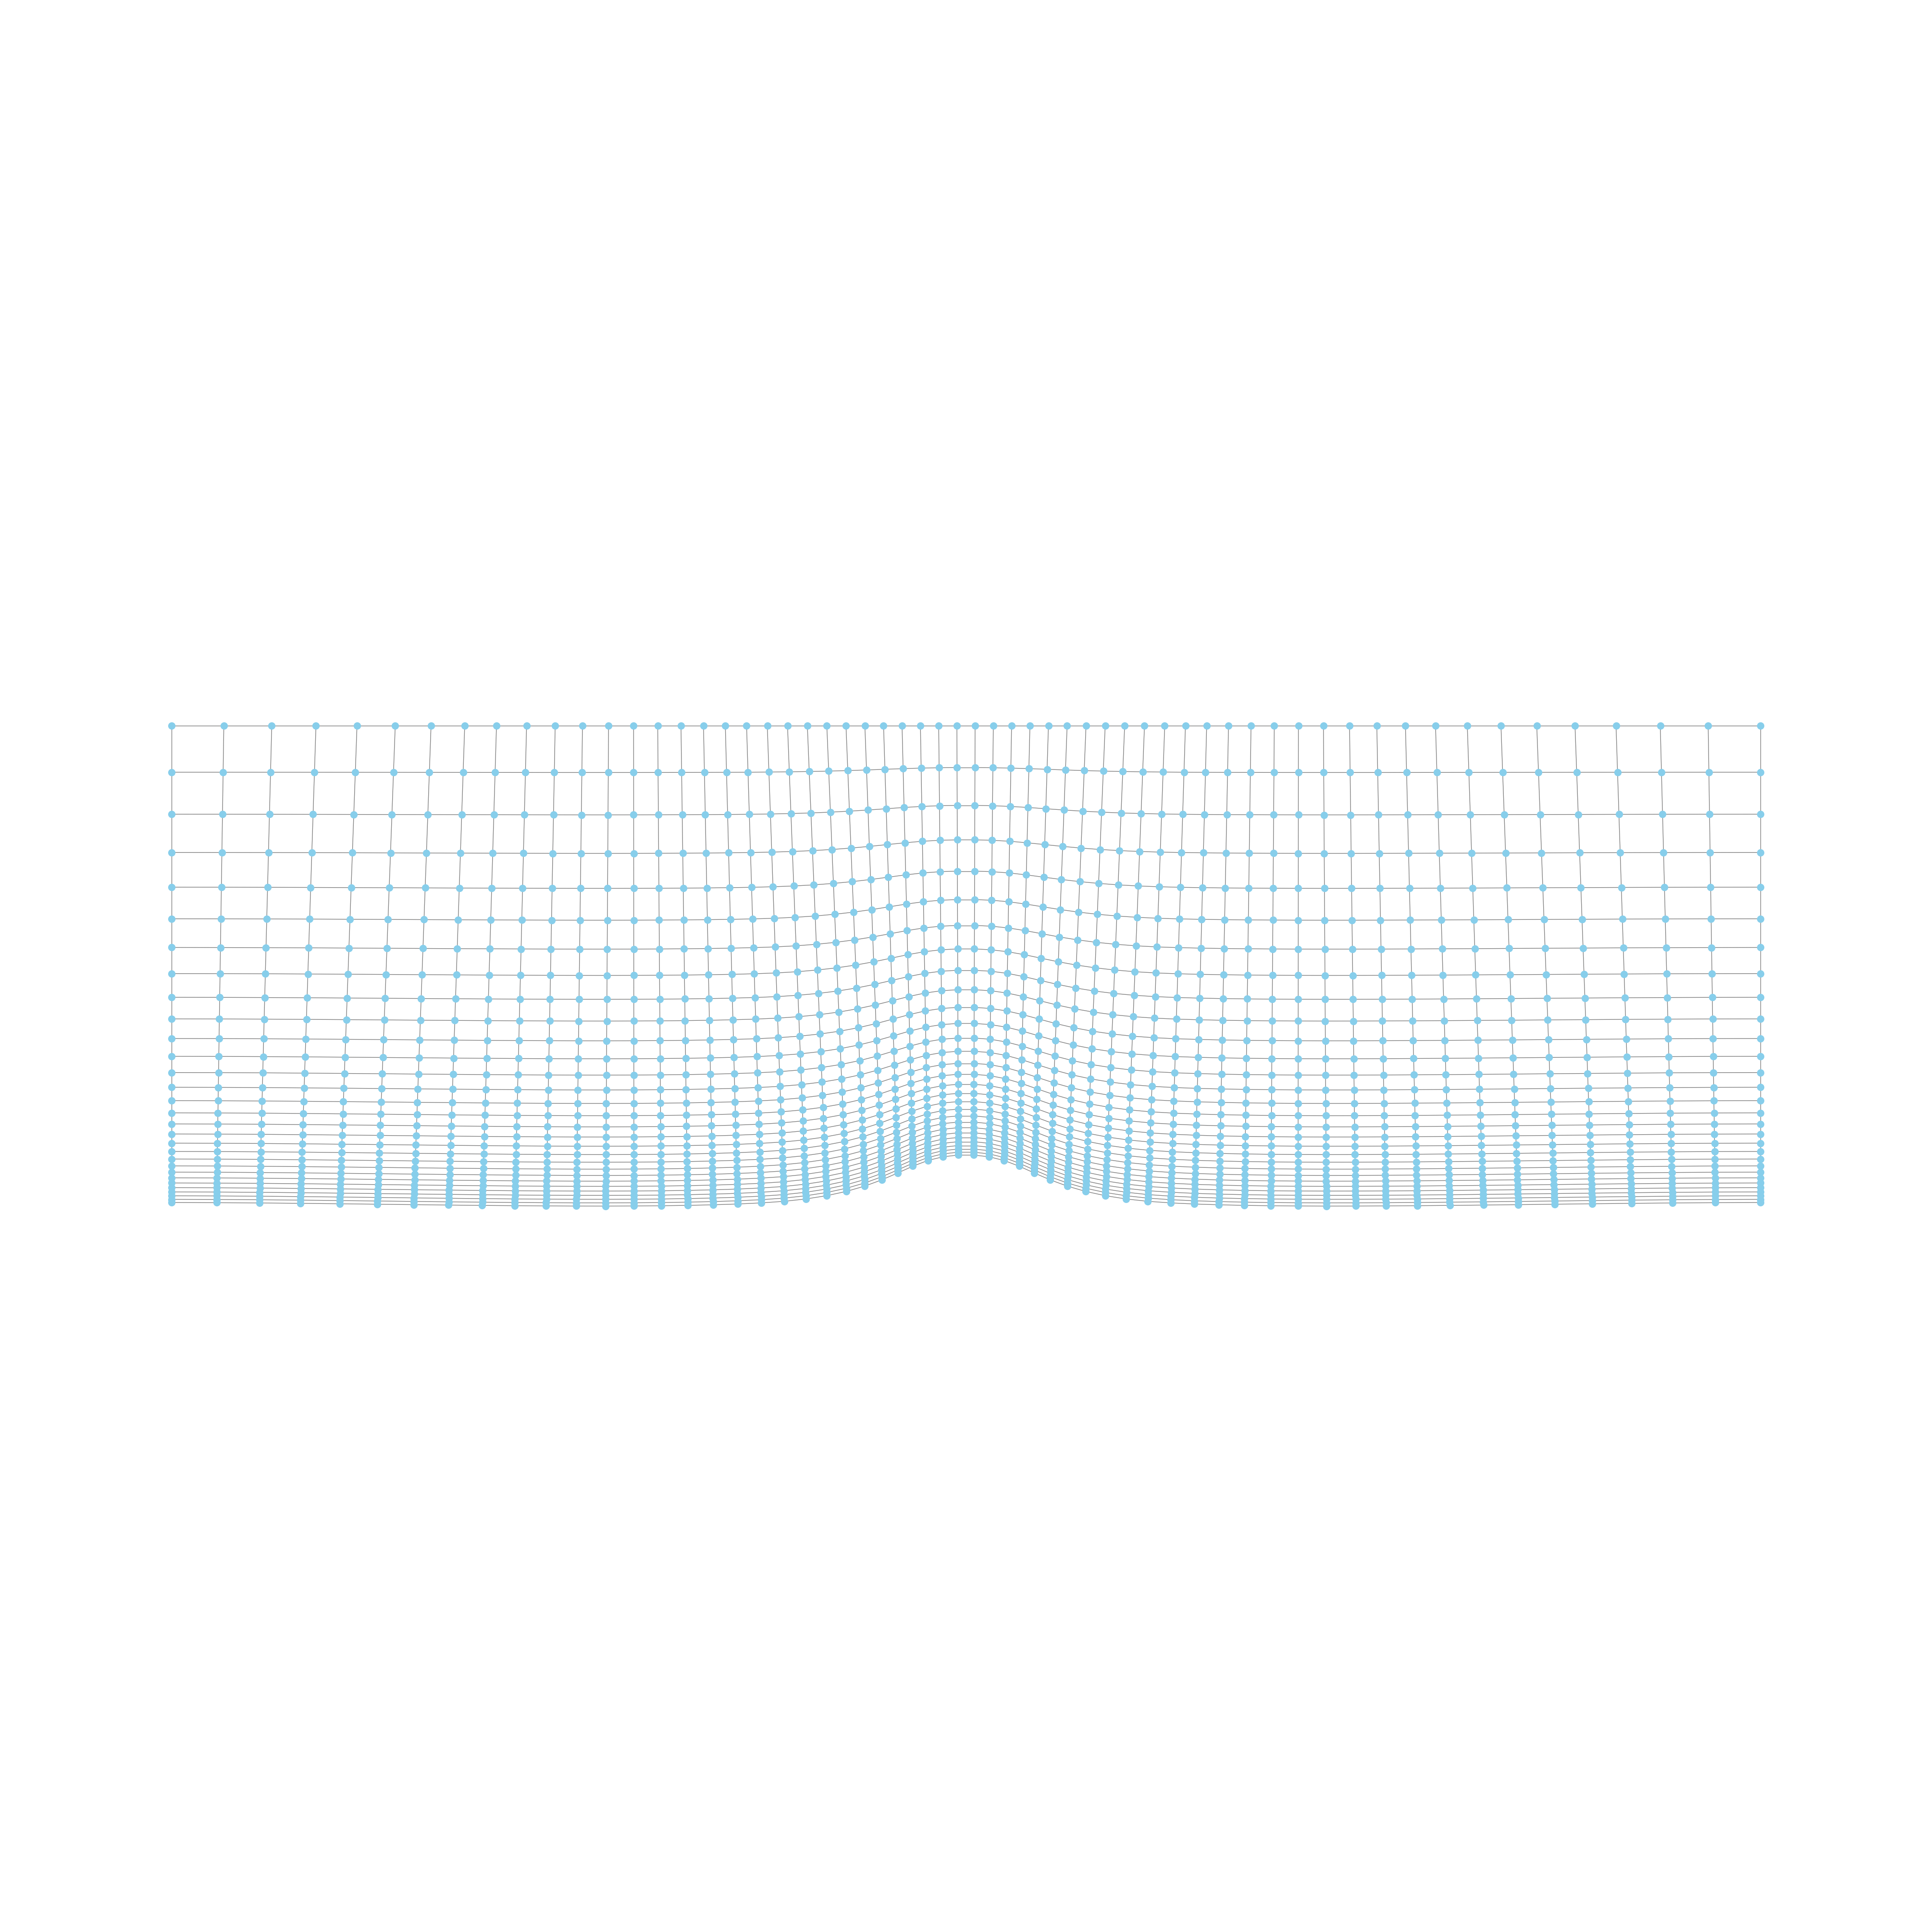

In [4]:
!pip install meshio
import meshio
import networkx as nx
import matplotlib.pyplot as plt


mesh = meshio.read("Bump.msh")  # Carico la mesh dal file .msh


edges = set() # Utilizzo un set() perchè elimina automaticamente i duplicati


# All'interno del dizionario  mesh.cells_dict si trova come chiave il tipo di cella ( triangolare, quadrata ..) mentre come valore si trova un array il cui numero di righe rappresenta
# il numero di quella tipologia di celle mentre come colonne i punti che compongono le rispettive celle


for cell_type, cell_array in mesh.cells_dict.items():
    for elem in cell_array:
        m = len(elem)
        if m >= 2:                       # salta gli elementi che hanno solo un punto
          for i in range(m):
                a = int(elem[i])
                b = int(elem[(i+1) % m])  # collega il nodo i finale chiudendolo con il primo
                edge = (min(a, b), max(a, b)) # si evitano i duplicati tipo (6,2)=(2,6) perchè si sta usando un grafo senza direzione
                edges.add(edge)


edge_list = list(edges)  # Converto il set in lista

# Creo il Grafo dalla lista degli archi
G = nx.Graph()
G.add_edges_from(edge_list)

# Per avere una rappresentazione del grafo cooerente con quella della mesh computazionale estraggo le coordinate (array N×3)
points = mesh.points
coords_2d = points[:, :2]     # essendo la mesh 2D prendo solo (x,y)

# Creo un dizionario {node_id: (x,y)}
coords_dict = {}
for i in range(coords_2d.shape[0]):
    coords_dict[i] = tuple(coords_2d[i])


plt.figure(figsize=(40,40))
nx.draw(G, pos=coords_dict,
        with_labels=False,
        node_color="skyblue", node_size=100, edge_color="gray")
plt.axis("equal")
plt.show()